# Running Event Data Visualization

## Overview

- Creates tables and manually adds made-up data.
- Provides a basic structure for marathon-related data.

In [12]:
!pip install plotly
!pip install numpy

## Initial Set-up

1. Connects to a database in memory
2. Clears data and tables if they are already created
3. Created the tables of the database
4. Adds the data manually
5. Print the first few rows

In [6]:
import sqlite3

db = sqlite3.connect(':memory:')
# db = sqlite3.connect('RunningEventDb.db')
cursor = db.cursor()

# Delete table and all it's content
query = '''DROP TABLE IF EXISTS Participants'''
cursor.execute(query)
query = '''DROP TABLE IF EXISTS Rankings'''
cursor.execute(query)
query = '''DROP TABLE IF EXISTS Categories'''
cursor.execute(query)
query = '''DROP TABLE IF EXISTS Event'''
cursor.execute(query)

# Create tables
query = '''CREATE TABLE Participants (
    ParticipantID INTEGER PRIMARY KEY AUTOINCREMENT,
    Name TEXT NOT NULL,
    Country TEXT,
    Age INTEGER NOT NULL,
    sex TEXT NOT NULL
);'''
cursor.execute(query)

query = '''CREATE TABLE Rankings (
    RankingID INTEGER PRIMARY KEY AUTOINCREMENT,
    ParticipantID INTEGER,
    EventId TEXT NOT NULL,
    CategoryID TEXT NOT NULL,
    AvgPace TEXT,
    Time TEXT NOT NULL,
    FOREIGN KEY (CategoryID) REFERENCES Categories(CategoryID),
    FOREIGN KEY (EventID) REFERENCES Events(EventID),
    FOREIGN KEY (ParticipantID) REFERENCES Participants(ParticipantID)
);'''
cursor.execute(query)

query = '''CREATE TABLE Category (
    CategoryID TEXT PRIMARY KEY,
    Name TEXT NOT NULL,
    Distance INTEGER NOT NULL
);'''
cursor.execute(query)

query = '''CREATE TABLE Event (
    EventID TEXT PRIMARY KEY ,
    Year INTEGER NOT NULL,
    Name TEXT NOT NULL
);'''
cursor.execute(query)

# Insert tables
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (0, 'Alice Smith', 'UK', 29, 'f')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (1, 'Ravi Kumar', 'India', 32, 'm')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (2, 'Hans Meier', 'Germany', 25, 'f')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (3, 'Maria Silva', 'UK', 35, 'f')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (4, 'Kenji Tanaka', 'Japan', 23, 'm')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (5, 'Emma Johnson', 'UK', 30, 'f')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (6, 'John Brown', 'UK', 33, 'm')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (7, 'Priya Sharma', 'UK', 30, 'm')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (8, 'Lena Fischer', 'UK', 26, 'f')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (9, 'James White', 'UK', 31, 'm')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (10, 'Ana Costa', 'Brazil', 40, 'f')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (11, 'Josh Bar', 'UK', 27, 'm')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (12, 'Sophia Lee', 'Canada', 29, 'm')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (13, 'George Clark', 'UK', 34, 'f')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (14, 'Arjun Das', 'India', 28, 'm')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (15, 'Katrin Müller', 'UK', 36, 'f')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (16, 'Robert Miller', 'UK', 29, 'm')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (17, 'Beatriz Gomes', 'Brazil', 31, 'm')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (18, 'Yuki Nishida', 'Japan', 30, 'f')''')
cursor.execute('''INSERT INTO Participants (ParticipantID, Name, Country, Age, sex) VALUES (19, 'Liam Wilson', 'UK', 28, 'm')''')

cursor.execute('''INSERT INTO Category (CategoryID, Name, Distance) VALUES ('CAT01', 'Marathon', 42)''')
cursor.execute('''INSERT INTO Category (CategoryID, Name, Distance) VALUES ('CAT02', 'Half Marathon', 21)''')
cursor.execute('''INSERT INTO Category (CategoryID, Name, Distance) VALUES ('CAT03', '10K Run', 10)''')
cursor.execute('''INSERT INTO Category (CategoryID, Name, Distance) VALUES ('CAT04', '5K Run', 5)''')
cursor.execute('''INSERT INTO Category (CategoryID, Name, Distance) VALUES ('CAT05', 'Fun Run', 3)''')

cursor.execute('''INSERT INTO Event (EventID, Year, Name) VALUES ('EVT01', 2023, 'City Marathon 2023')''')
cursor.execute('''INSERT INTO Event (EventID, Year, Name) VALUES ('EVT02', 2023, 'Spring Half Marathon 2023')''')
cursor.execute('''INSERT INTO Event (EventID, Year, Name) VALUES ('EVT03', 2022, 'Winter 10K Run 2022')''')
cursor.execute('''INSERT INTO Event (EventID, Year, Name) VALUES ('EVT04', 2021, 'Summer Fun Run 2021')''')
cursor.execute('''INSERT INTO Event (EventID, Year, Name) VALUES ('EVT05', 2020, 'Autumn Marathon 2020')''')

# Participants for Marathon (CAT001)
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0000, 0, 'EVT01', 'CAT01', '5:45', '4:01:30')''')  # Alice Smith, 29, f
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0001, 1, 'EVT01', 'CAT01', '5:15', '3:40:00')''')  # Ravi Kumar, 32, m
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0002, 2, 'EVT01', 'CAT01', '5:30', '3:50:00')''')  # Hans Meier, 25, f
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0003, 3, 'EVT01', 'CAT01', '5:50', '4:05:00')''')  # Maria Silva, 35, f
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0004, 4, 'EVT01', 'CAT01', '5:10', '3:49:30')''')  # Kenji Tanaka, 28, m
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0005, 5, 'EVT01', 'CAT01', '5:40', '3:56:40')''')  # Emma Johnson, 30, f
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0006, 6, 'EVT01', 'CAT01', '5:20', '3:43:20')''')  # John Brown, 33, m
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0007, 7, 'EVT01', 'CAT01', '5:25', '3:47:30')''')  # Priya Sharma, 30, m
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0008, 8, 'EVT01', 'CAT01', '5:35', '3:53:45')''')  # Lena Fischer, 26, f
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0009, 9, 'EVT01', 'CAT01', '5:18', '3:41:40')''')  # James White, 31, m

# Participants for Half Marathon (CAT002)
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0010, 10, 'EVT01', 'CAT02', '4:55', '1:43:05')''')  # Ana Costa, 40, f
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0011, 11, 'EVT01', 'CAT02', '4:40', '1:38:20')''')  # Hiroshi Yamamoto, 27, m
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0012, 12, 'EVT01', 'CAT02', '4:50', '1:41:40')''')  # Sophia Lee, 29, m
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0013, 13, 'EVT01', 'CAT02', '5:05', '1:46:55')''')  # George Clark, 34, f
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0014, 14, 'EVT01', 'CAT02', '4:45', '1:39:45')''')  # Arjun Das, 28, m
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0015, 15, 'EVT01', 'CAT02', '5:00', '1:45:00')''')  # Katrin Müller, 36, f
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0016, 16, 'EVT01', 'CAT02', '4:48', '1:40:48')''')  # Robert Miller, 29, m
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0017, 17, 'EVT01', 'CAT02', '5:10', '1:48:10')''')  # Beatriz Gomes, 37, m
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0018, 18, 'EVT01', 'CAT02', '4:58', '1:44:22')''')  # Yuki Nishida, 30, f
cursor.execute('''INSERT INTO Rankings (RankingID, ParticipantID, EventId, CategoryID, AvgPace, Time) VALUES (0019, 19, 'EVT01', 'CAT02', '4:42', '1:39:12')''')  # Liam Wilson, 28, m

query = '''SELECT Name, Country FROM Participants'''
cursor.execute(query)
allParticipants = cursor.fetchall()
for participant in allParticipants:
    print(participant[0], " | ", participant[1])

db.commit()


Alice Smith  |  UK
Ravi Kumar  |  India
Hans Meier  |  Germany
Maria Silva  |  UK
Kenji Tanaka  |  Japan
Emma Johnson  |  UK
John Brown  |  UK
Priya Sharma  |  UK
Lena Fischer  |  UK
James White  |  UK
Ana Costa  |  Brazil
Josh Bar  |  UK
Sophia Lee  |  Canada
George Clark  |  UK
Arjun Das  |  India
Katrin Müller  |  UK
Robert Miller  |  UK
Beatriz Gomes  |  Brazil
Yuki Nishida  |  Japan
Liam Wilson  |  UK


In [7]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Visualization: Countries representation by participants

The pie chart represents the countries where the participants are from and the percentage.

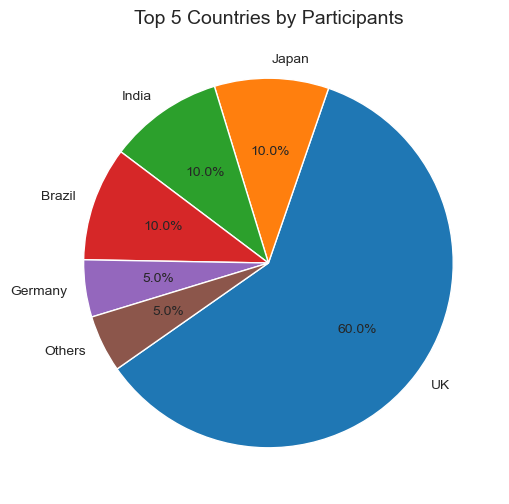

In [8]:
query = '''SELECT Country, COUNT(*) FROM Participants GROUP BY Country ORDER BY COUNT(*) DESC'''
cursor.execute(query)
countriesData = cursor.fetchall()

countries = []
countriesCount = []

for country in countriesData:
    countries.append(country[0])
    countriesCount.append(country[1])


# Take the first 5 countries and add the rest as "Others"
top5Count = countriesCount[:5]
top5Countries = countries[:5]
othersCount = sum(countriesCount[5:])
top5Count.append(othersCount)
top5Countries.append("Others")

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    top5Count,
    labels=top5Countries,
    autopct='%1.1f%%',
    startangle=215,
)

# Add Legend
# plt.legend(
#     title="Countries",
#     loc="center right",
#     labels=top5Countries,
#     bbox_to_anchor=(1, 0, 0.5, 1),
# )

# Add a title
plt.title("Top 5 Countries by Participants", fontsize=14)

# Show chart
plt.show()

## 2. Visualization: Participants Age by Gender

Represented in a pyramid age distribution. The chart represents the participants age by gender. Female runners seem to be older than the males even if the data is limited.

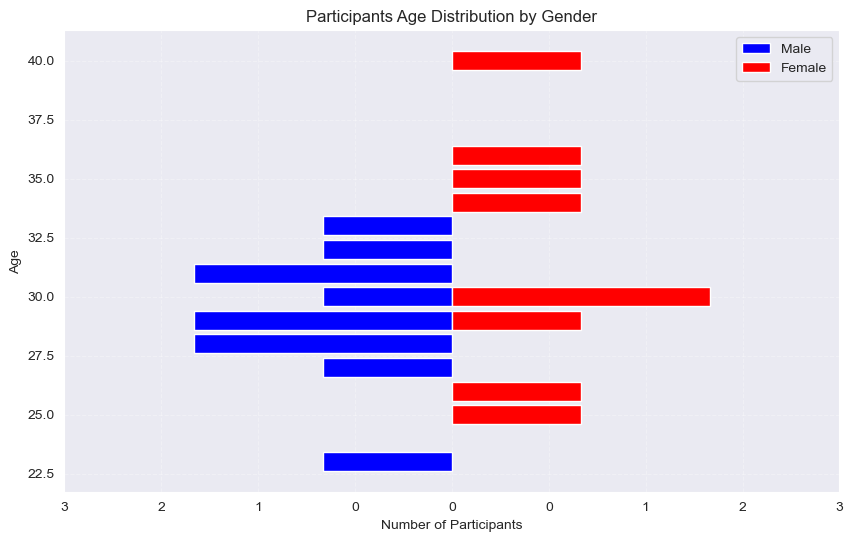

In [9]:
query = '''SELECT Age, COUNT(Age) FROM Participants WHERE Sex='m' GROUP BY Age ORDER BY COUNT(Age) DESC'''
cursor.execute(query)
maleAgeData = cursor.fetchall()

femaleQuery = '''SELECT Age, COUNT(Age) FROM Participants WHERE Sex = 'f' GROUP BY Age ORDER BY COUNT(Age) DESC'''
cursor.execute(femaleQuery)
femaleAgeData = cursor.fetchall()


maleAgeLabels = []
maleAgeCount = []
femaleAgeLabels = []
femaleAgeCount = []

for femaleAge in femaleAgeData:
    femaleAgeLabels.append(femaleAge[0])
    femaleAgeCount.append(femaleAge[1])


for maleAge in maleAgeData:
    maleAgeLabels.append(maleAge[0])
    maleAgeCount.append(-maleAge[1])


fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(linestyle='--', alpha=0.3, zorder=0)
ax.barh(maleAgeLabels, maleAgeCount, color='blue', label='Male', align='center', zorder=3)
ax.barh(femaleAgeLabels, femaleAgeCount, color='red', label='Female', align='center', zorder=3)

# Labels and title
ax.set_xlabel("Number of Participants")
ax.set_ylabel("Age")
ax.set_title("Participants Age Distribution by Gender")

# Define the maximum absolute value between male and female counts for symmetry
max_count = 3
# Generate symmetric tick positions for both left and right sides
xticks = np.linspace(-max_count, max_count, num=9)  # Adjust `num` for more or fewer ticks
# Set the tick positions
ax.set_xticks(xticks)
# Convert to absolute values for display, keeping 0 in the center
ax.set_xticklabels([abs(int(x)) for x in xticks])

# Add legend
ax.legend()

# Show the plot
plt.show()


## 3. Visualization: Finishing times by Gender

Using Box Plot chart is ideal to show the distribution of the finishing times by gender, showing the medians, maximums and minimums.

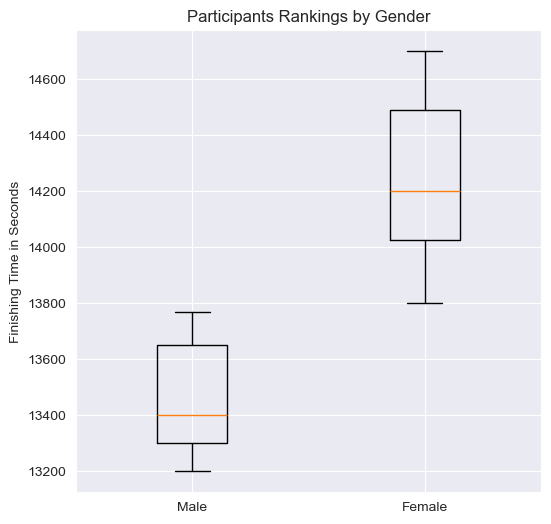

In [15]:
query = '''DROP VIEW IF EXISTS MarathonRankings'''
cursor.execute(query)

query = '''
CREATE VIEW MarathonRankings AS
SELECT
Rankings.ParticipantID AS ParticipantID,
Rankings.Time AS Time,
Participants.Sex AS Sex,
Category.CategoryID AS CategoryID
FROM Rankings
    JOIN Participants ON Rankings.ParticipantID = Participants.ParticipantID
    JOIN Event ON Rankings.EventID = Event.EventID
    JOIN Category ON Rankings.CategoryID = Category.CategoryID
'''
cursor.execute(query)

maleRankingsSeconds = []
femaleRankingsSeconds = []
maleLabel = []
femaleLabel = []

query = '''SELECT TIME FROM MarathonRankings WHERE CategoryID='CAT01' AND Sex='m' ORDER BY Time'''
cursor.execute(query)
maleRankings = cursor.fetchall()

query = '''SELECT TIME FROM MarathonRankings WHERE CategoryID='CAT01' AND Sex='f' ORDER BY Time'''
cursor.execute(query)
femaleRankings = cursor.fetchall()

def time_to_seconds(time):
    time = time.split(':')
    time[0] = int(time[0]) * 3600
    time[1] = int(time[1]) * 60
    time[2] = int(time[2])
    return sum(time)


for maleRanking in maleRankings:
    maleLabel.append(maleRanking[0])
    maleRankingsSeconds.append(time_to_seconds(maleRanking[0]))

for femaleRanking in femaleRankings:
    femaleLabel.append(femaleRanking[0])
    femaleRankingsSeconds.append(time_to_seconds(femaleRanking[0]))


fig, ax = plt.subplots(figsize=(6, 6))

plt.boxplot([maleRankingsSeconds, femaleRankingsSeconds], tick_labels=['Male', 'Female'], widths=0.3)

ax.set_title("Participants Rankings by Gender")

plt.ylabel("Finishing Time in Seconds")

# plt.legend()
plt.show()